In [6]:
#Importing required libs 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Data Cleaning/Preparation
#The data cleaning steps included removing duplicates, handling missing values, and ensuring the dataset is ready for analysis.

# Read the health data set using pandas lib 
health_data = pd.read_csv ("healthcare_dataset.csv", sep =",")

# Remove all the duplicates from our data set 
health_data = health_data.drop_duplicates()

# Remove rows with null value 
health_data = health_data.dropna()

# Length of our data set 
print(f"Length of our data set is {len(health_data)}")

# Check if there are any null values in the dataset after cleaning

has_nan = health_data.isna().any().any()

if has_nan:
    print("There are null values in the Dataset.")
else:
    print("There are no null values in the Dataset.")

Length of our data set is 54966
There are no null values in the Dataset.


In [15]:
health_data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


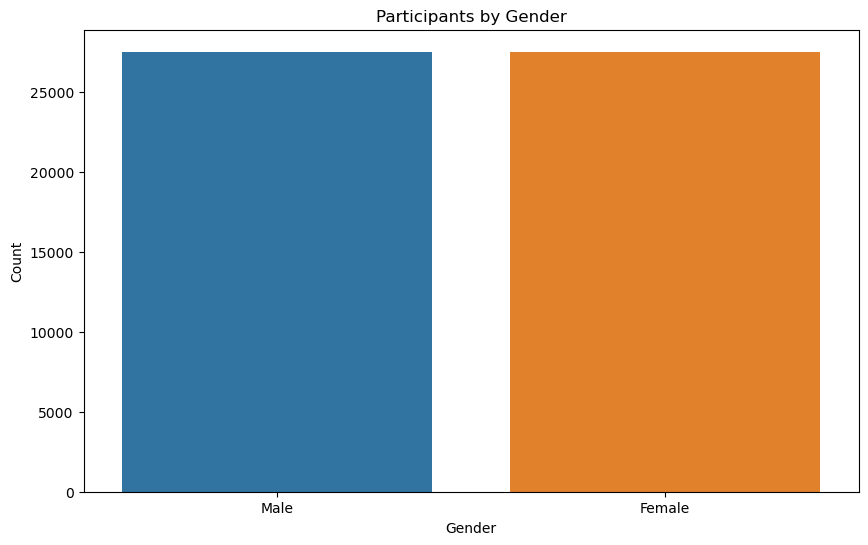

In [16]:
#Exploratory Data Analysis -- Participants by Gender

# Plot of pariticpants by gender in our dataset 
plt.figure(figsize=(10, 6))
sns.countplot(x=health_data['Gender'], data=health_data)
plt.title('Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

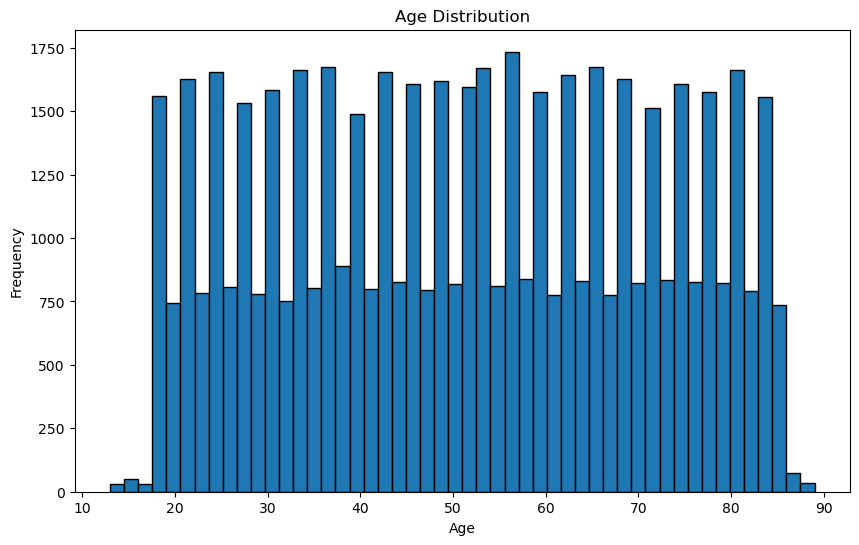

In [17]:
# Distribution of participant age in our dataset  -- Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(health_data['Age'], bins=50, edgecolor='black')  # Adjust number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

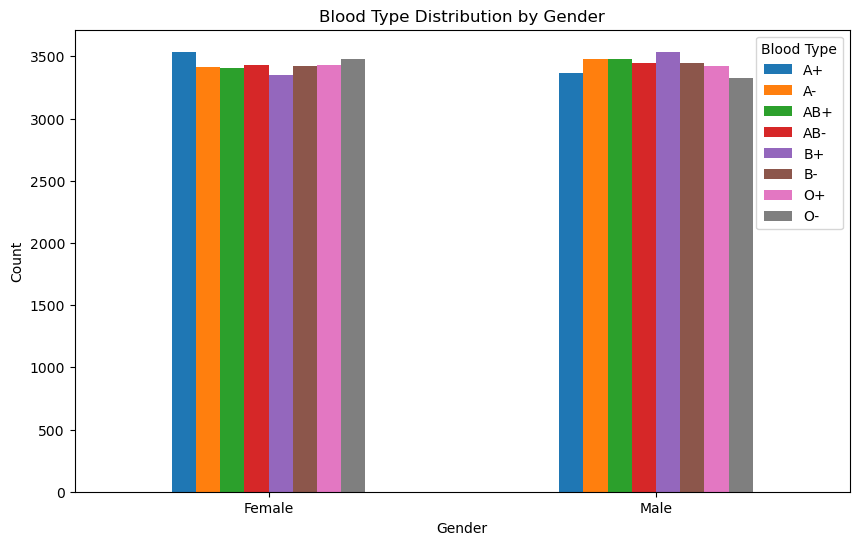

In [18]:
# Group by 'gender' and 'blood_type'
grouped = health_data.groupby(['Gender', 'Blood Type']).size().unstack()

# Plotting the grouped bar plot
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Blood Type Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Blood Type')
plt.show()

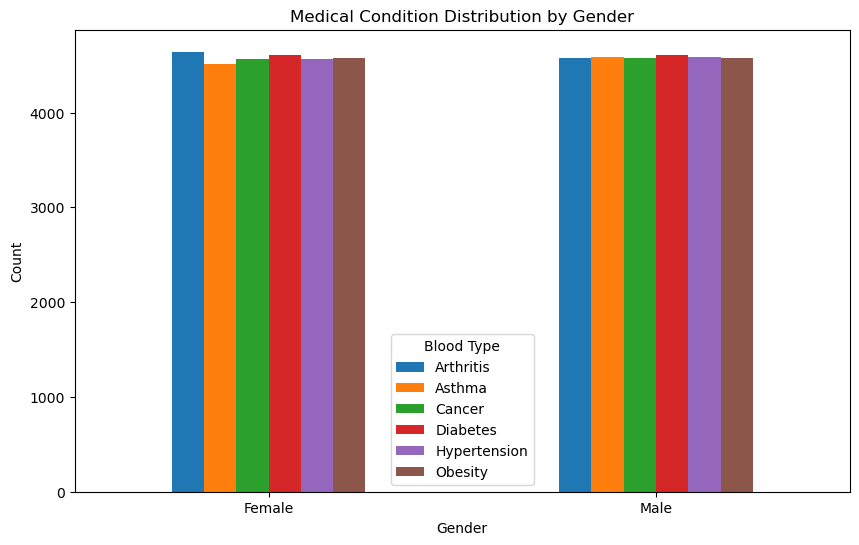

In [19]:
# Group by 'gender' and 'Medical Condition'
grouped = health_data.groupby(['Gender', 'Medical Condition']).size().unstack()

# Plotting the grouped bar plot
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Medical Condition Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Blood Type')
plt.show()

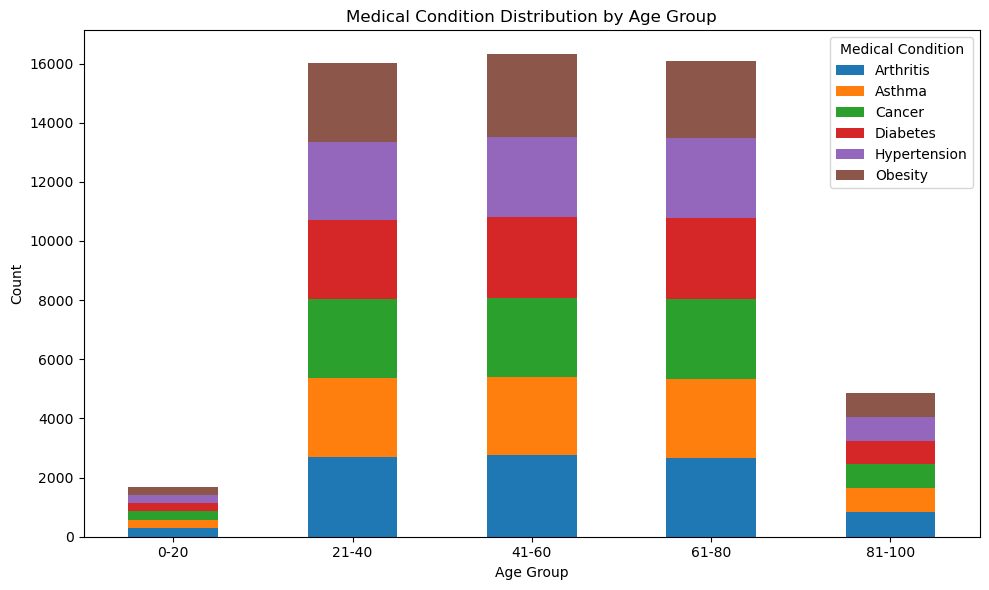

In [20]:
#Medical Condition Distribution by Age Group

# Here we define age groups
age_bins = [0, 20, 40, 60, 80, 100] 

# Lables for the above age groups 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Categorize ages into groups 
health_data['Age Group'] = pd.cut(health_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Age Group' and 'Medical Condition', then count occurrences
grouped = health_data.groupby(['Age Group', 'Medical Condition'], observed=False).size().unstack().fillna(0)

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Medical Condition Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Medical Condition', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [70]:
#Model Selection Process
#Evaluated several models including linear regression, logistic regression, decision trees, and random forest classifiers.
#Final model selected based on evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

import pandas as pd #For data manipulation and analysis
import numpy as np #For numerical operations
from sklearn.model_selection import train_test_split #For splitting the data into training and testing sets
from sklearn.linear_model import LogisticRegression # For logistic regression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #For ensemble methods like RandomForest and GradientBoosting classifiers.
from sklearn.preprocessing import StandardScaler #For standardizing the data.
from sklearn.metrics import classification_report, roc_auc_score #For evaluating the performance of the models

#Read the health data set
health_data = pd.read_csv("healthcare_dataset.csv", sep=",")

#Drop duplicates and rows with null values
health_data = health_data.drop_duplicates().dropna()

#One-hot encode categorical variables
health_data = pd.get_dummies(health_data, columns=['Gender', 'Blood Type', 'Insurance Provider'], drop_first=True)

#Create a binary target variable, i.e. 'Cancer'
#Creates a binary target variable, where 1 indicates 'Cancer' and 0 indicates other conditions.
health_data['Target'] = health_data['Medical Condition'].apply(lambda x: 1 if x == 'Cancer' else 0)

# Re-define the same features for the model
features = [
    'Age', 'Billing Amount', 'Gender_Male', 
    'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_B-', 'Blood Type_O+', 
    'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna', 
    'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare'
]

#Define X and y
X = health_data[features]
y = health_data['Target']

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_predictions))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, log_reg_predictions))

#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, rf_predictions))

#Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predictions))
print("Gradient Boosting ROC AUC Score:", roc_auc_score(y_test, gb_predictions))

C:\Users\Pete P\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pete P\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pete P\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     13748
           1       0.00      0.00      0.00      2742

    accuracy                           0.83     16490
   macro avg       0.42      0.50      0.45     16490
weighted avg       0.70      0.83      0.76     16490

Logistic Regression ROC AUC Score: 0.5
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88     13748
           1       0.20      0.08      0.11      2742

    accuracy                           0.79     16490
   macro avg       0.52      0.51      0.50     16490
weighted avg       0.73      0.79      0.76     16490

Random Forest ROC AUC Score: 0.5074170061630342
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     13748
           1       0.43   

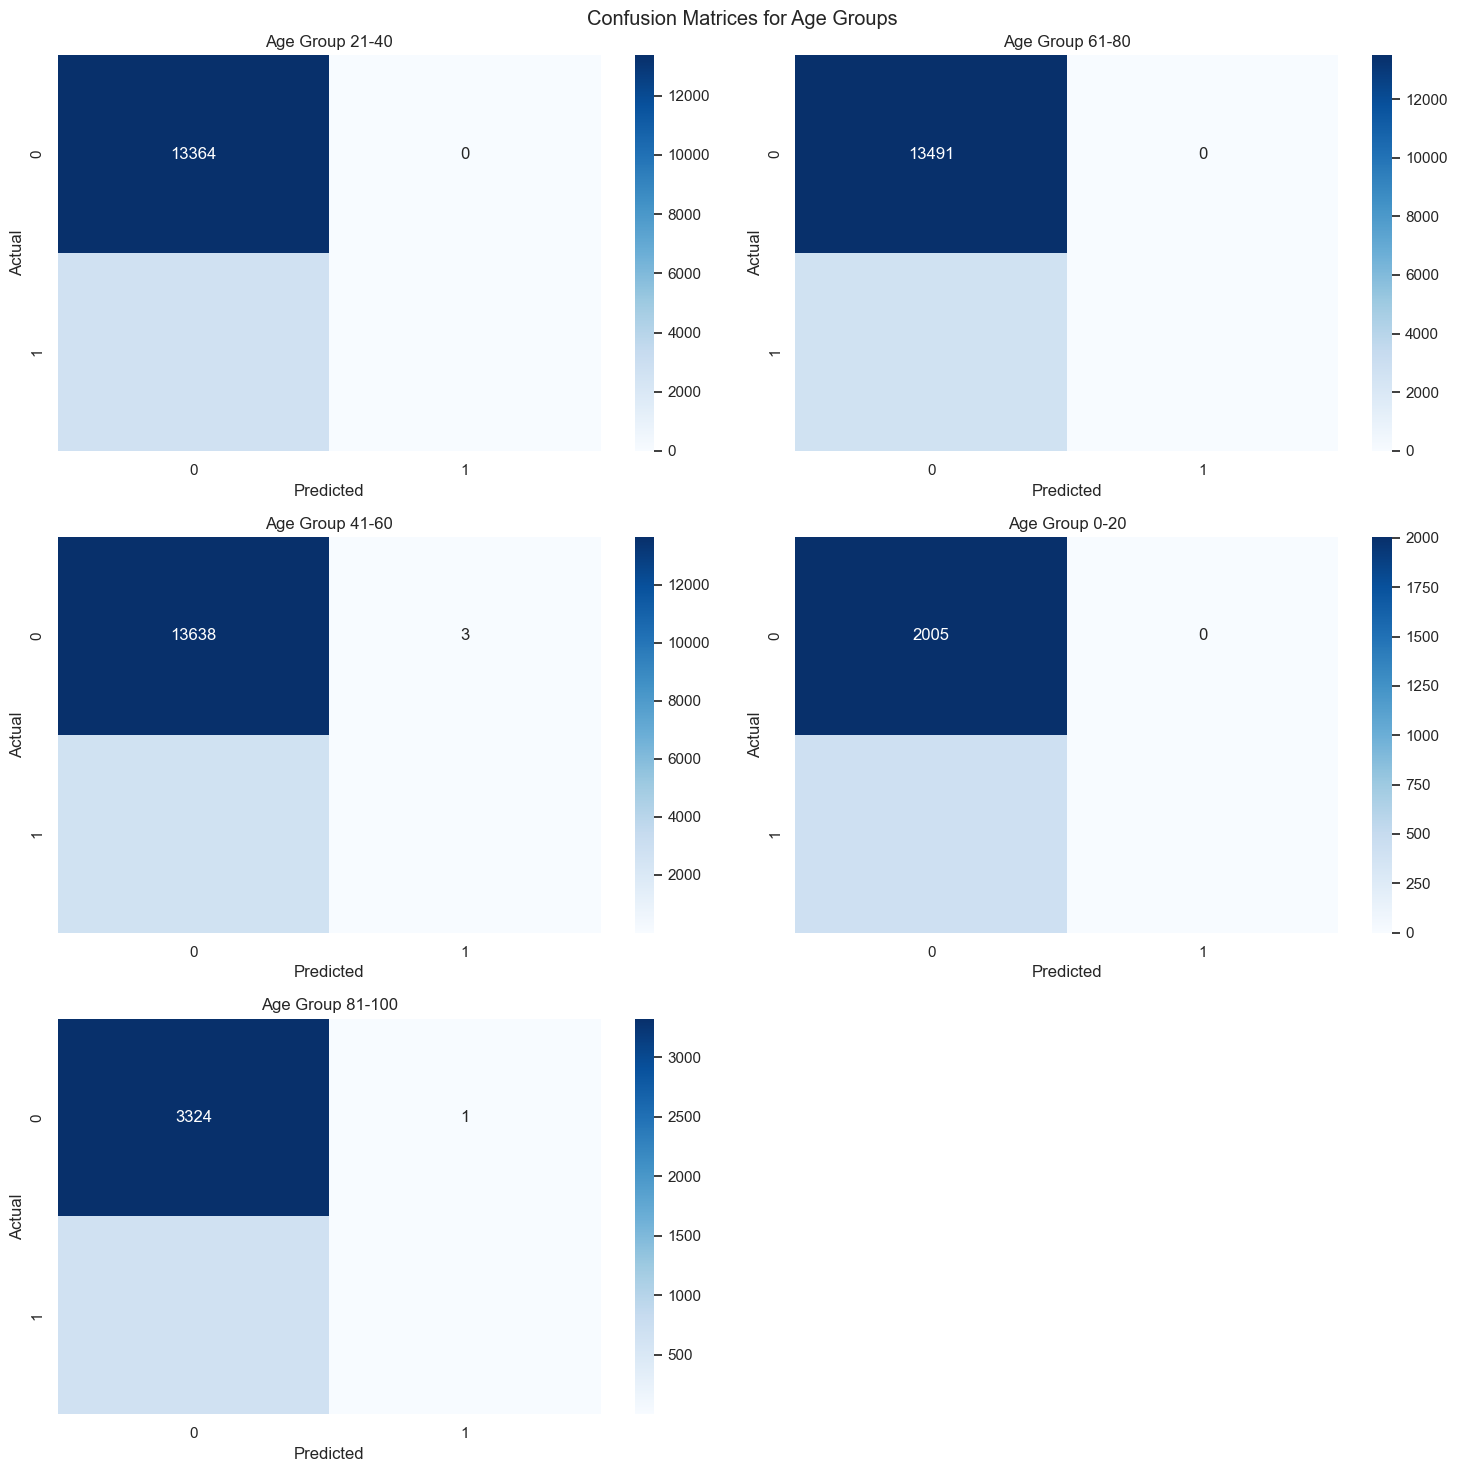

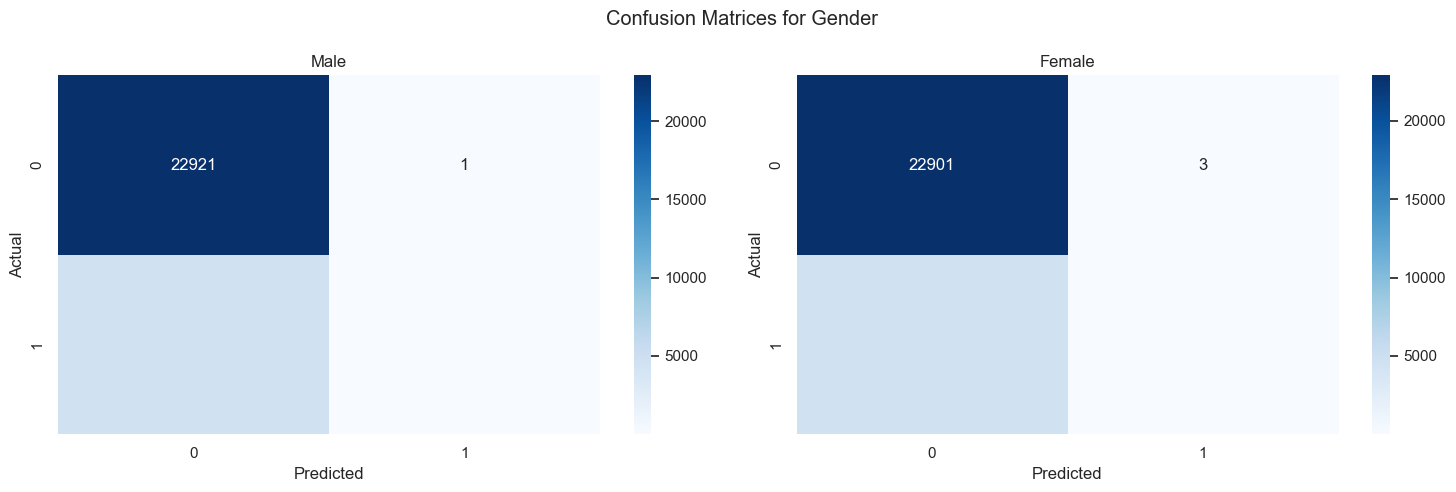

In [69]:
# Visualization of Model Performance by Age and Gender Groups
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Age Group Analysis
health_data['Age Group'] = pd.cut(health_data['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
age_groups = health_data['Age Group'].unique()

# Creating subplots for age group analysis
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Confusion Matrices for Age Groups')

#iterates over each age group, filtering the data, scaling it, making predictions, and plotting the confusion matrix for each group
for i, age_group in enumerate(age_groups):
    if pd.isna(age_group):
        continue
    age_group_data = health_data[health_data['Age Group'] == age_group]
    X_age_group = scaler.transform(age_group_data[features])
    y_age_group = age_group_data['Target']
    gb_predictions_age_group = gb_model.predict(X_age_group)
    plot_confusion_matrix(axes[i // 2, i % 2], y_age_group, gb_predictions_age_group, f'Age Group {age_group}')

# hides any unused subplots to ensure the layout is clean.
for i in range(len(age_groups), 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Gender Analysis
genders = health_data['Gender_Male'].unique()

# Creating subplots for gender analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Confusion Matrices for Gender')

# Iterates over each gender, filtering the data, scaling it, making predictions, and plotting the confusion matrix for each gender.
for i, gender in enumerate(genders):
    gender_data = health_data[health_data['Gender_Male'] == gender]
    X_gender = scaler.transform(gender_data[features])
    y_gender = gender_data['Target']
    gb_predictions_gender = gb_model.predict(X_gender)
    gender_title = 'Male' if gender == 1 else 'Female'
    plot_confusion_matrix(axes[i], y_gender, gb_predictions_gender, f'{gender_title}')

plt.tight_layout()
plt.show()
